# Data Analysis: Case Study of Car's Dataset

<img src="images/range_rover_car.jpg" alt="drawing" width="500"/>

<h3>Welcome to Techcamp Data Science Class</h3>

By the end of this notebook, you will have learned the basics of Data Wrangling! 

<h2>Class Agenda</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="#identify_missing_values">Identify missing values</a></li>
            <li><a href="#deal_missing_values">Deal with missing values</a></li>
            <li><a href="#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Data standardization</a></li>
    <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Indicator variable</a></li>
</ul>
</div>
 
<hr>

In [49]:
## Dataset Used --> Column Header

# headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
#          "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
#          "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
#          "peak-rpm","city-mpg","highway-mpg","price"]

# 1. symboling:                -3, -2, -1, 0, 1, 2, 3.
# 2. normalized-losses:        continuous from 65 to 256.
# 3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
#                            isuzu, jaguar, mazda, mercedes-benz, mercury,
#                            mitsubishi, nissan, peugot, plymouth, porsche,
#                            renault, saab, subaru, toyota, volkswagen, volvo
# 4. fuel-type:                diesel, gas.
# 5. aspiration:               std, turbo.
# 6. num-of-doors:             four, two.
# 7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
# 8. drive-wheels:             4wd, fwd, rwd.
# 9. engine-location:          front, rear.
# 10. wheel-base:               continuous from 86.6 120.9.
# 11. length:                   continuous from 1b41.1 to 208.1.
# 12. width:                    continuous from 60.3 to 72.3.
# 13. height:                   continuous from 47.8 to 59.8.
# 14. curb-weight:              continuous from 1488 to 4066.
# 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
# 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
# 17. engine-size:              continuous from 61 to 326.
# 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
# 19. bore:                     continuous from 2.54 to 3.94.
# 20. stroke:                   continuous from 2.07 to 4.17.
# 21. compression-ratio:        continuous from 7 to 23.
# 22. horsepower:               continuous from 48 to 288.
# 23. peak-rpm:                 continuous from 4150 to 6600.
# 24. city-mpg:                 continuous from 13 to 49.
# 25. highway-mpg:              continuous from 16 to 54.
# 26. price:                    continuous from 5118 to 45400.

<style>
    
</style>
<div>
    <img id="engine_type" src="images/engine_type.jpg" alt="drawing" width="400"/>
    <img id="compression_ratio" src="images/compression_ratio.jpg" alt="drawing" width="400"/>
    <img id="boreandstroke" src="images/boreandstoke.jpg" alt="drawing" width="400"/>
    <img id="rpm_revolutions_per_min" src="images/rpm_revolutions_per_min.jpg" alt="drawing" width="400"/>
</div>

<h2>What is the purpose of Data Wrangling?</h2>

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

### Import Required Libraries

In [50]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [51]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Import Data

##### Use the Pandas method <b>read_csv()</b> to load the data from the csv file.

In [52]:
import os

In [53]:
print(os.listdir('../Datasets'))

['car_messy.data', 'olympics_data']


### Display a Subset of the Data

In [54]:
car = pd.read_csv('../Datasets/car_messy.data',header=None)

### Add Column Names to the DataFrame

In [55]:
car.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [56]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [57]:
car.columns = headers

In [58]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Lets Describe the Data! To see if its in good shape!

In [59]:
car.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## 1. Handling Missing Data

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
So, how do we identify all those missing values and deal with them?

### Steps for working with missing data:
   - **Identify missing data**
   - **Deal with missing data**
   - **Correct data format**

### Evaluating for Missing Data

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [60]:
car.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [61]:
np.nan

nan

In [62]:
car.replace('?',np.nan,inplace=True)

In [63]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Count missing values in each column

In [64]:
car.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [65]:
car.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Dealing with missing data 
**How do we deal with missing data?**

- **Drop data**  
        a. Drop the whole row
        b. Drop the whole column   
- **Replace data** 
        a. Replace it by mean
        b. Replace it by frequency
        c. Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

## Column: "normalized-losses" | Strategy: Replace with Mean

In [69]:
# step one
# covert normalised losses into proper datatypes

# car['normalized.losses'] = car['normalized-losses'].astype('int')

# car[car['normalized-losses'].notnull()] 


# car.loc[car['normalized-losses'].notnull()]['normalized-losses']= \
# car.loc[car['normalized-losses'].notnull()]['normalized-losses'].astype(int)


# FIND THE MEAN

car[car['normalized-losses'].notnull()]['normalized-losses'].astype('int').mean()

# USE THE MEAN TO REPLACE THE VALUES.fIRST PUT IT ON A VARIBALE

normalized_mean=car[car['normalized-losses'].notnull()]['normalized-losses'].astype('int').mean()



In [72]:
# Actual replace of values

# car['normalized-losses']=car['normalized-losses'].replace(np.nan,normalized_mean)

car['normalized-losses'].replace(np.nan,normalized_mean,inplace=True)


In [71]:
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1</h1>

<p><b>According to the example above, replace NaN in:</b> stroke, bore, horsepower, peak-rpm, normalized-losses</p>
</div>

SyntaxError: invalid syntax (<ipython-input-71-e94c3c226fe0>, line 1)

In [73]:
car.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


## Column: "num-of-doors" | Strategy: Replace with Frequency

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2</h1>

<p><b>Replace the missing 'num-of-doors' values by the most frequent</b></p>
</div>

In [74]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [83]:
car.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [84]:
car[car['horsepower'].notnull()][''].astype('int').mean()


104.25615763546799

In [85]:
horsepower_mean=car[car['horsepower'].notnull()]['horsepower'].astype('int').mean()


In [86]:
horsepower_mean=car[car['horsepower'].notnull()]['horsepower'].astype('int').mean()


In [114]:
car['horsepower'].replace(np.nan,horsepower_mean,inplace=True)

for column_name in ['stroke', 'bore']:
    car[column_name].fillna(value=car[column_name].notnull().astype('float').mean(), inplace=True)

car['peak-rpm'].fillna(value=car['peak-rpm'].notnull().astype('int').mean(), inplace=True)

In [115]:
car.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [97]:
# Fill in number of doors  question 2

max_value=car['num-of-doors'].value_counts().idxmax()

In [98]:
car['num-of-doors'].fillna(value=max_value, inplace=True)

In [99]:
car.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

## Column: "price" | Strategy: Delete an entire missing row

In [108]:
# price column drop
# axis='index,column or value'

car.dropna(subset=['price'],axis='index',inplace=True)

In [109]:
car.shape

(201, 26)

In [110]:
car.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<b>Good!</b> Now, we obtain the dataset with no missing values.

## 2. Correcting Data Format

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

<h4>Lets list the data types for each column</h4>

In [102]:
car.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [116]:
# normalized-losses-int
# bore and stroke-float

# step 1
# create dictionary
convert_type={"normalized-losses":"int",
        "bore":"float",
         "horsepower":"int",
         "peak-rpm":"int",
         "price":"float"
        }

for column_name, correct_type in convert_type.items():
    car[column_name] = car[column_name].astype(correct_type)

In [117]:
car.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h4>Convert data types to proper format</h4>

<h4>Let us list the columns after the conversion</h4>

<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

## 3. Data Standardization
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>


<p>The formula for unit conversion is<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>

In [125]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)

# 1 mile /gallon =0.425144 km/liters

# step 1:create new column

car['highway-kmpl']=round(car['highway-mpg']*0.425144)
car['highway-kmpl'].head()


# city-mpg
car['city-kmpl']=round(car['city-mpg']*0.425144)
car['city-kmpl'].head()


# drop the previous existing columns

car.drop(columns=['highway-mpg','city-mpg'], inplace=True)


KeyError: 'highway-mpg'

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg", and change the name of column to "highway-L/100km".</b>
</div>

In [126]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'highway-kmpl', 'city-kmpl'], dtype='object')

## 4. Data Normalization

**Why normalization?**
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>

In [132]:
car['height']=(car['height']-car['height'].mean()) /car['height'].std()


# minimax scalling

# car['height']=(car['height']-car['height'].min())
# /car['height'].max()-car['height'].min())



## 5. Binning

**Why binning?**
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

**Example:**
In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins

In [135]:
# get the bins ie m minimum  and maximum values for column horsepower
max_horsepower = car['horsepower'].max()
min_horsepower = car['horsepower'].min()

# split equally into 3 sections
bins = np.linspace(min_horsepower, max_horsepower, 4)

# group names
group_names = ['low', 'medium', 'high']

car['horsepower_bins'] = pd.cut(car['horsepower'], bins, labels=group_names, include_lowest=True)

<h3>Example of Binning Data In Pandas</h3>

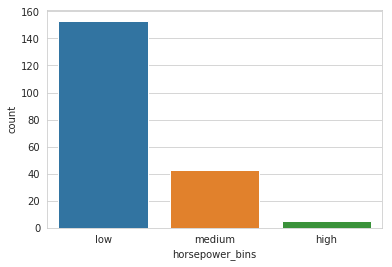

In [136]:

sns.countplot(x='horsepower_bins',data=car)

 Convert data to correct format 

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.

In [ ]:
# sns.countplot(x='horsepower_bins', data=car_df)

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>What is the number of Vehicles in each Bin?</b>
</div>

In [143]:
car['horsepower_bins'].value_counts()

low       153
medium     43
high        5
Name: horsepower_bins, dtype: int64

Lets plot the distribution of each bin.

<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

The plot above shows the binning result for attribute "horsepower". 

## 6. Indicator variable (or dummy variable)
<b>What is an indicator variable?</b>
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 

In [151]:
pd.get_dummies(car[['fuel-type','aspiration','body-style']])

,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,0,1,1,0,1,0,0,0,0
1,0,1,1,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0
4,0,1,1,0,0,0,0,1,0
5,0,1,1,0,0,0,0,1,0
6,0,1,1,0,0,0,0,1,0
7,0,1,1,0,0,0,0,0,1
8,0,1,0,1,0,0,0,1,0
10,0,1,1,0,0,0,0,1,0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6: </h1>

<b>As above, create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.</b>
</div>

In [145]:
indicator_df=pd.get_dummies(car[['fuel-type','aspiration','body-style']])

,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,0,1,1,0,1,0,0,0,0
1,0,1,1,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0
4,0,1,1,0,0,0,0,1,0
5,0,1,1,0,0,0,0,1,0
6,0,1,1,0,0,0,0,1,0
7,0,1,1,0,0,0,0,0,1
8,0,1,0,1,0,0,0,1,0
10,0,1,1,0,0,0,0,1,0


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #7: </h1>

<b>Merge the new dataframe to the original dataframe then drop the column 'aspiration'</b>
</div>

In [ ]:
# Write your code below and press Shift+Enter to execute 

### Save your DataFrame

In [155]:
car=pd.concat([car, indicator_df], axis=1)

In [153]:
car.drop(columns=['fuel-type','aspiration','body-style'], axis=1, inplace=True)


KeyError: "['fuel-type' 'aspiration' 'body-style'] not found in axis"

In [156]:
car.head()

,symboling,normalized-losses,make,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,highway-kmpl,city-kmpl,horsepower_bins,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,highway-kmpl,city-kmpl,horsepower_bins,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,122,alfa-romero,two,rwd,front,88.6,168.8,64.1,-2.029015,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,11.0,9.0,low,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,-2.029015,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,11.0,9.0,low,0,1,1,0,1,0,0,0,0
1,3,122,alfa-romero,two,rwd,front,88.6,168.8,64.1,-2.029015,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,11.0,9.0,low,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,-2.029015,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,11.0,9.0,low,0,1,1,0,1,0,0,0,0
2,1,122,alfa-romero,two,rwd,front,94.5,171.2,65.5,-0.558319,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,11.0,8.0,medium,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,-0.558319,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,11.0,8.0,medium,0,1,1,0,0,0,1,0,0
3,2,164,audi,four,fwd,front,99.8,176.6,66.2,0.217881,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,13.0,10.0,low,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,0.217881,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,13.0,10.0,low,0,1,1,0,0,0,0,1,0
4,2,164,audi,four,4wd,front,99.4,176.6,66.4,0.217881,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,9.0,8.0,low,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,0.217881,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,9.0,8.0,low,0,1,1,0,0,0,0,1,0


<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/billyotieno/" target="_blank">Billy Otieno</a> and <a href="https://www.linkedin.com/in/sammy-ongaya-866793b7/" target="_blank">Sammy Ongaya</a>. For the purpose of Introducing TechCamp Students to Data Science Concepts.